In [1]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np 

In [46]:
import nltk
import re
import pickle
import gc

In [3]:
df = pd.read_csv("mbti_1.csv")
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
np.random.choice(df.posts[0].split("|||"))

'Banned for being too much of a thundering, grumbling kind of storm... yep.'

In [6]:
posts = df.posts
len(posts)

8675

In [7]:
df["single_posts"] = df.posts.apply(lambda x: np.random.choice(x.split("|||")))

In [47]:
df2 = df.loc[:, ["type", "single_posts"]]
del df
gc.collect()

3693

Clean Data using lambda

In [48]:
df2['clean_text'] = (df2['single_posts'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x).lower()))
df2.clean_text.head(30)

0         when your main social outlet is xbox live ...
1     not really  i ve never thought of e i or j p a...
2                                                      
3     i am both annoyed and intrigued by xxfps   as ...
4                           http   youtu be pzbqamewtoe
5     i did not say it disproved god  i merely said ...
6     i think infjs sometimes need to be kicked out ...
7     yes i would say i am  more than physical appea...
8           https   www youtube com watch v pule   yro 
9     galumphing on the net  drowning myself in musi...
10    i don t have a fb profile   it s definitely ba...
11                                           welcome   
12    dear istp you amaze me by being one of the few...
13    nfs  especially infjs   xntps  esfxs are proba...
14    i believe emotions are a choice that is made b...
15    i support this  my phone has affected my life ...
16    on paper it does seem heartless  but i think i...
17    well  i tend to be kind of    over confide

In [18]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\xengo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [49]:
words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())

df2['clean_text'] = df2['clean_text'].apply(clean_sent)

Tokenize posts using lambda

In [50]:
df2['tokenized_posts'] = df2.apply(lambda row: nltk.word_tokenize(row['clean_text']), axis=1)

In [51]:
df2['tokenized_posts']

0       [when, your, main, social, outlet, is, live, a...
1       [not, really, i, never, thought, of, e, i, or,...
2                                                      []
3       [i, am, both, and, by, as, far, as, i, can, te...
4                                                    [be]
                              ...                        
8670    [by, being, white, and, not, i, am, to, white,...
8671    [rune, that, is, an, awesome, photo, e, card, ...
8672                                     [free, for, all]
8673    [if, i, had, to, guess, for, my, i, don, t, kn...
8674    [i, would, be, with, the, tenth, all, the, way...
Name: tokenized_posts, Length: 8675, dtype: object

In [22]:
len(df2.tokenized_posts)

8675

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             8675 non-null   object
 1   single_posts     8675 non-null   object
 2   clean_text       8675 non-null   object
 3   tokenized_posts  8675 non-null   object
dtypes: object(4)
memory usage: 271.2+ KB


In [53]:
df2.head()

,type,single_posts,clean_text,tokenized_posts
0,INFJ,... when your main social outlet is xbox live ...,when your main social outlet is live and even ...,"[when, your, main, social, outlet, is, live, a..."
1,ENTP,Not really; I've never thought of E/I or J/P a...,not really i never thought of e i or j p as re...,"[not, really, i, never, thought, of, e, i, or,..."
2,INTP,256818,,[]
3,INTJ,I am both annoyed and intrigued by xxFPs. As ...,i am both and by as far as i can tell i dislik...,"[i, am, both, and, by, as, far, as, i, can, te..."
4,ENTJ,http://youtu.be/PZbqAMEwtOE,be,[be]


Use lambda to get rid of stopwords. then run allwords again

In [25]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [54]:
allwords =[]


for x in df2.tokenized_posts:
    allwords.extend(x)


In [55]:
filtered_posts=[ w for w in allwords if w not in stop_words ]

In [56]:
filtered_posts[1]

'social'

Frequency Distribution

In [57]:
from nltk.probability import FreqDist

In [58]:
fdist = FreqDist(filtered_posts)
print(fdist)
fdist.most_common(10)

<FreqDist with 8290 samples and 87830 outcomes>


[('like', 1452),
 ('think', 1032),
 ('people', 969),
 ('one', 785),
 ('know', 737),
 ('really', 724),
 ('would', 689),
 ('get', 634),
 ('time', 560),
 ('well', 496)]

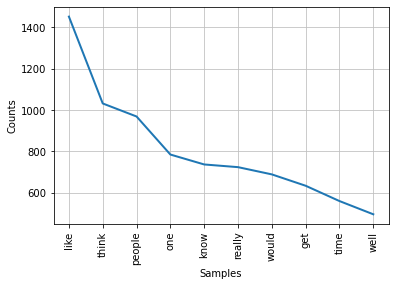

In [59]:
fdist.plot(10,cumulative=False)
plt.show()

In [60]:
from nltk.stem import WordNetLemmatizer 
# Init the Wordnet Lemmatizer
lem = WordNetLemmatizer()

lemma_words=[(lem.lemmatize(w,"v")) for w in filtered_posts]

In [ ]:
# print(len(lemma_words))
# print(len(filtered_posts))

In [61]:
fdist3 = FreqDist(lemma_words)
print(fdist3)
fdist3.most_common(10)

<FreqDist with 7362 samples and 87830 outcomes>


[('like', 1462),
 ('think', 1407),
 ('get', 973),
 ('people', 969),
 ('know', 836),
 ('one', 785),
 ('really', 724),
 ('say', 712),
 ('go', 704),
 ('would', 689)]

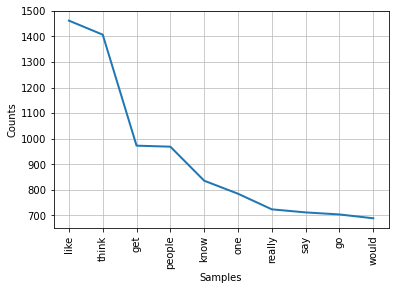

In [62]:
fdist3.plot(10,cumulative=False)
plt.show()

In [82]:
lemma_words2 = list(filter(lambda x: x[1]>1, fdist3.items()))
lemma_words2 = [x[0] for x in lemma_words2]

In [83]:
lemma_words2[0]


'main'

In [84]:
# lemma_words_pos = nltk.pos_tag(lemma_words)

Creating Feature Generation for TD-IDF analysis

In [85]:
len(lemma_words2)

4343

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
text_counts= cv.fit_transform(lemma_words2)

In [87]:
# print(cv.get_feature_names())
# print(text_counts.toarray())

In [88]:
dtm = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())


 Feature Generation using TF-IDF

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()
text_tf= tf.fit_transform(lemma_words2)

In [98]:
tf_df = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names())


In [99]:
sentiments = [((TextBlob(phrase).sentiment.polarity)) for phrase in lemma_words2 ]

tf_df["Sentiment"] = sentiments

In [100]:
tf_df.head(20)

,aa,abandon,ability,able,abnormal,aboard,abortion,abroad,absence,absent,...,yoga,young,younger,youth,zero,zombie,zone,zoo,zoom,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [101]:
tf_df.shape

(4343, 4326)

In [102]:
tf_df.Sentiment.describe()

count    4343.000000
mean        0.004363
std         0.164469
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Sentiment, dtype: float64

In [103]:
tf_df["_target"] = df2["type"]

In [104]:
tf_df.head()

,aa,abandon,ability,able,abnormal,aboard,abortion,abroad,absence,absent,...,young,younger,youth,zero,zombie,zone,zoo,zoom,Sentiment,_target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,INFJ
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,ENTP
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,INTP
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,INTJ
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,ENTJ


In [108]:
# tf_df.to_csv("tf_df.csv", index=False, header=True)